In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
sns.set(rc={'figure.figsize':(10, 8)})

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep =';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

1) Каков средний возраст холостых/незамужних клиентов?

In [3]:
df[df['marital'] == "single"]["age"].mean()

33.15871369294606

2) В какой день недели (признак day_of_week) чаще всего звонили клиентам, отказавшимся от депозита?

In [4]:
df[df['y'] == 'no']['day_of_week'].value_counts()

mon    7667
thu    7578
wed    7185
tue    7137
fri    6981
Name: day_of_week, dtype: int64

Вывод: по информации выше, можно увидеть что чаще всего звонили клиентам в понидельник

3) Постройте инфографику по признакам marital и y. Какие выводы можно сделать?

<AxesSubplot:xlabel='count', ylabel='marital'>

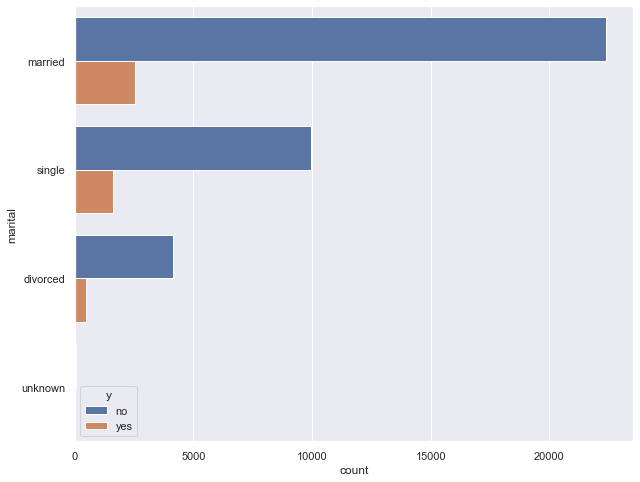

In [5]:
sns.countplot(y='marital', hue='y', data=df)

In [6]:
pd.crosstab(df.marital, df.y)

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


Вывод: депозиты имеют холостяки, женатые и разведенные. Если человек женат, то это не означает что у него обязательно есть депозит, так как найбольшее количесто людей у кого нет депозита - женаты. Так же у женатых найбольшее количество депозитов

4) Имеется ли связь между наличием кредита (default) у клиента и результатом? Постройте инфографику.

<AxesSubplot:xlabel='count', ylabel='default'>

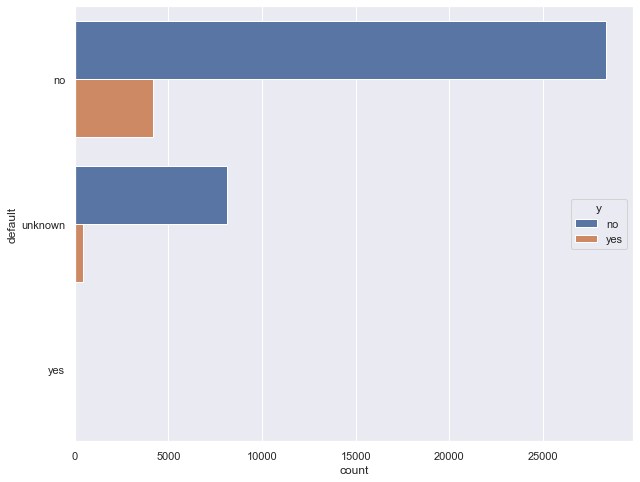

In [7]:
sns.countplot(y='default', hue='y', data=df)

In [8]:
pd.crosstab(df.default, df.y)

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


Вывод: Как можно увидеть, когда у человека есть кредит, то у него нет депозита. Также большенство людей просто не хотят иметь депозит, даже не смотря на то что у них нет кредитов

5) Визуализируйте информацию об уровне образования в зависимости от среднего возраста. Есть ли статистически значимая взаимосвязь между ними?

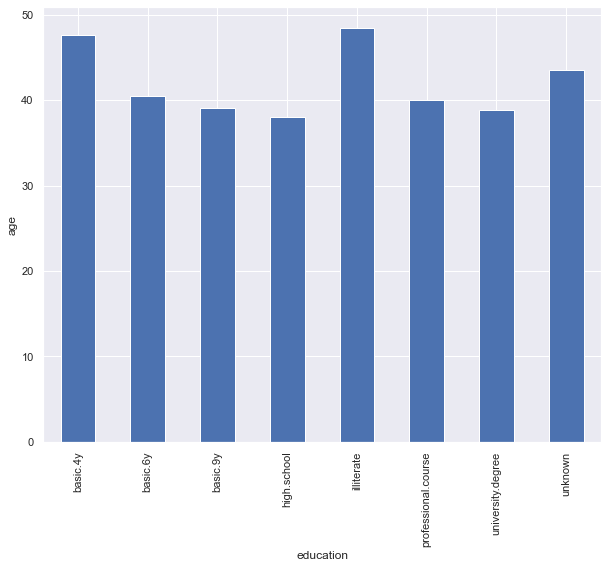

In [9]:
df.groupby('education')['age'].mean().plot(kind='bar') 
plt.ylabel('age') # добавляем подпись на оси Оу
plt.show()

6) Что можно сказать о связи между длительностью контакта (признак duration) и возрастом клиента? Найдите коэффициент корреляции.

Тут построю несколько графиков для более детального анализа. Для начала jointplot для того чтобы определить где найбольшее скопление данных (точек)

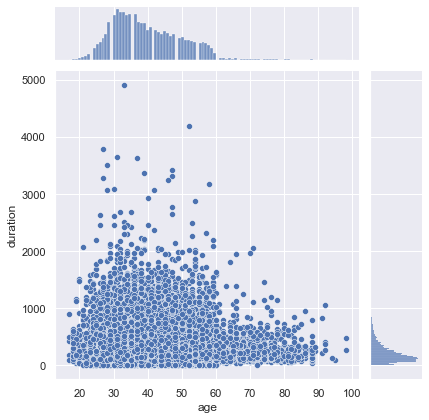

In [10]:
sns.jointplot(x='age', y='duration', data=df)

Теперь построим график, найдем линейную регрессию и отобразим.

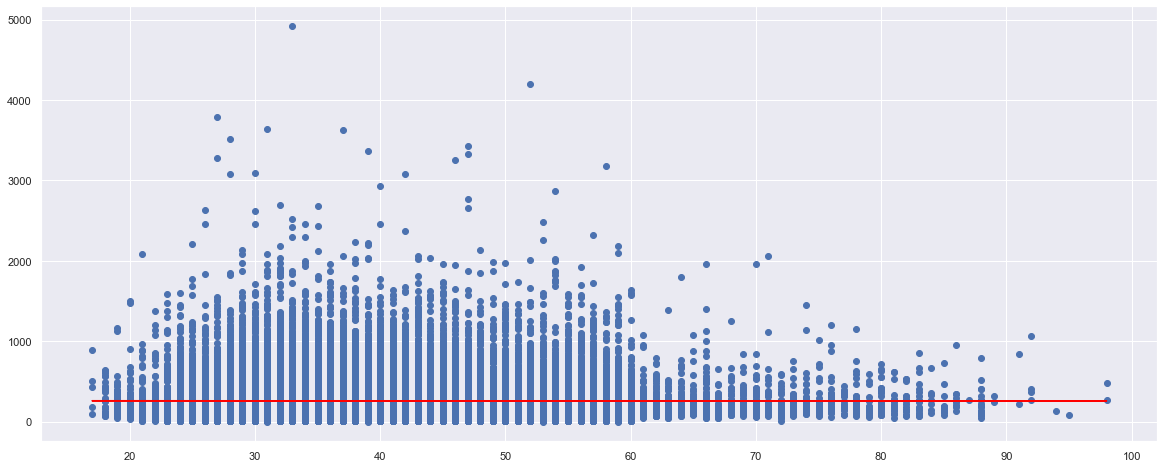

In [11]:
plt.figure(figsize=(20, 8))
x = df.age
y = df.duration

stats = linregress(x, y)

m = stats.slope
b = stats.intercept
plt.scatter(x, y)
plt.plot(x, m * x + b, 'red')
plt.show()

На графике, не смотря на то, что мы нарисовали регрессию нельзя понять как конкретно меняются данные при увиличении возраста. Поэтому посчитаем коофициент кореляции.

<AxesSubplot:>

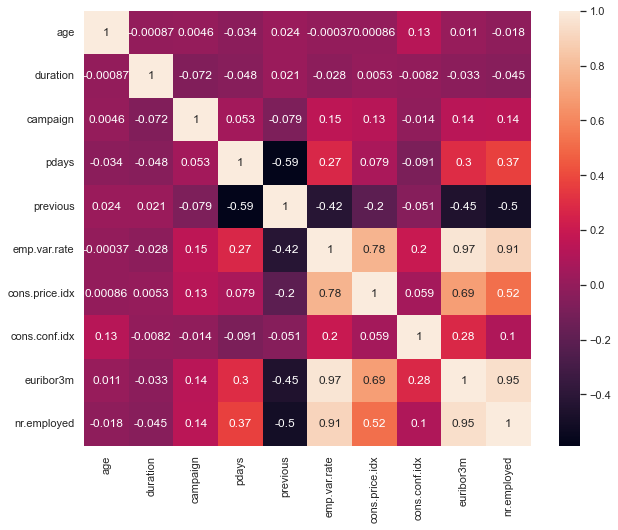

In [12]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True)

Как видим корреляция хоть и отрицательно, но приблизительно к 0. Поэтому более пожелые люди берут депозит меньше или на более маленький срок чем люди помоложе, но разница маленькая и незначительная. Поэтому вывод можно сделать, что взаимозависимость age и duration незначительна.

Теперь нарисуем графики. где выведем средний срок по возрастам. А так же нарисуем график среднего найменьшего и найбольших значений, чтобы оценить размах

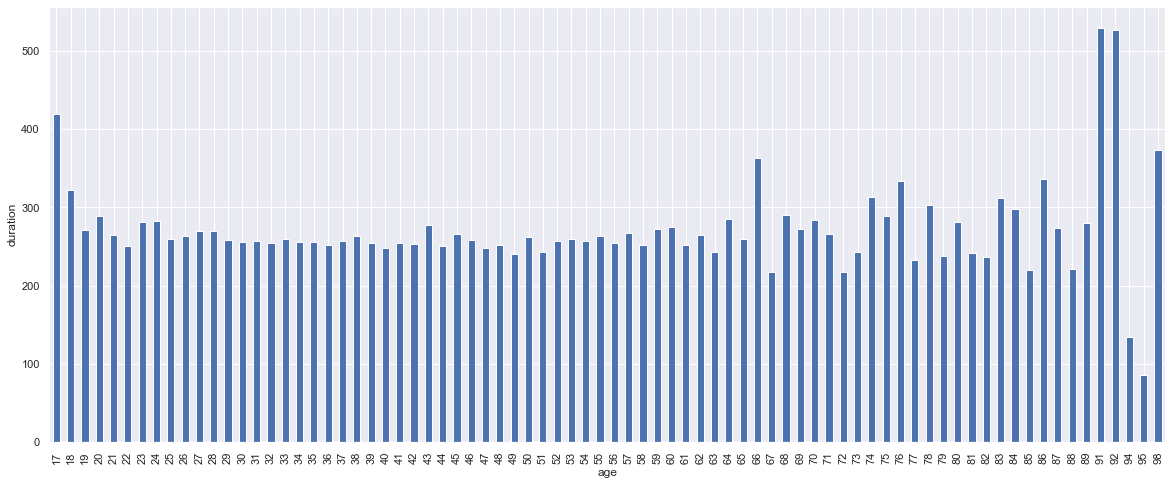

In [13]:
plt.figure(figsize=(20, 8))
df.groupby('age')['duration'].mean().plot(kind='bar') 
plt.ylabel('duration')
plt.show()

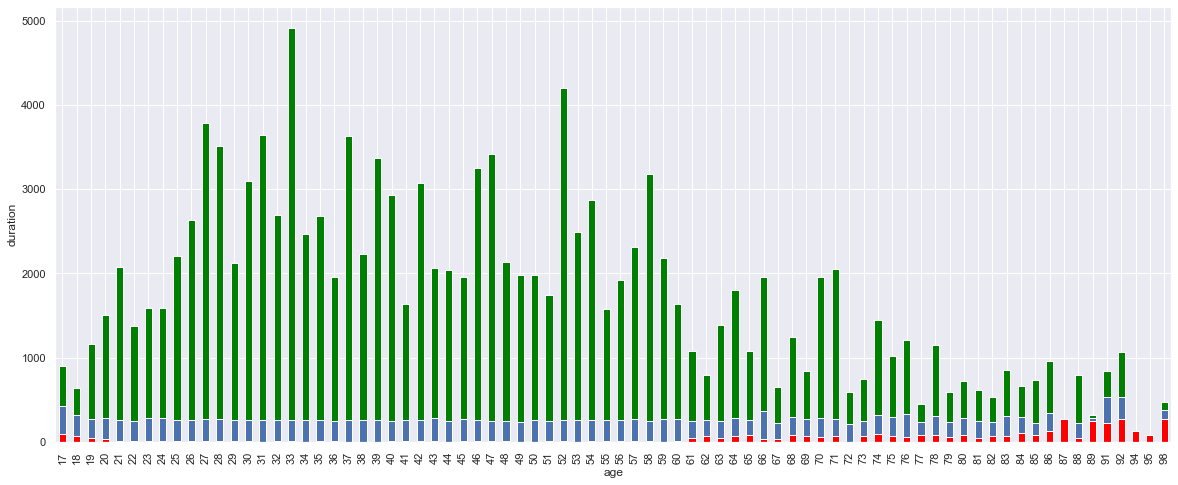

In [14]:
plt.figure(figsize=(20, 8))
df.groupby('age')['duration'].max().plot(kind='bar', color="green") 
df.groupby('age')['duration'].mean().plot(kind='bar') 
df.groupby('age')['duration'].min().plot(kind='bar', color="red") 
plt.ylabel('duration')
plt.show()

6) Как связаны признаки education и housing?

In [15]:
pd.crosstab(df.education, df.housing)

housing,no,unknown,yes
education,,,
basic.4y,1955,117,2104
basic.6y,1070,60,1162
basic.9y,2743,151,3151
high.school,4363,220,4932
illiterate,8,0,10
professional.course,2280,125,2838
university.degree,5387,277,6504
unknown,816,40,875


7) Какие ещё инсайты можно найти в имеющихся данных? Творческое задание.

Оценим как много людей, что берут в займ имеют депозит.

In [16]:
pd.crosstab(df.loan, df.y)

y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


Как можно увидеть, если у человека есть займ то он с большей вероятностью у него не будет депозита. Поэтому будем смотерть кто берет в займ

Для начала оценим сколько людей берут в займ оценивая семейное положение (женат, не женат, разведён). Строим таблицу и потом график

In [17]:
pd.crosstab(df.marital, df.loan)

loan,no,unknown,yes
marital,,,
divorced,3816,121,675
married,20567,588,3773
single,9500,280,1788
unknown,67,1,12


<AxesSubplot:xlabel='count', ylabel='marital'>

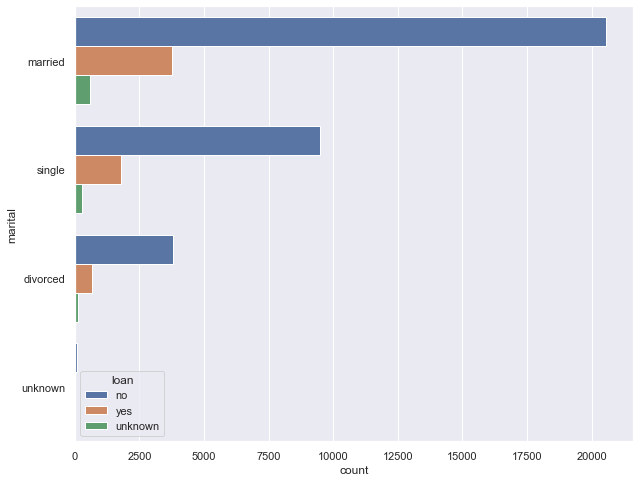

In [18]:
sns.countplot(y='marital', hue='loan', data=df)

Теперь оценим кем работают те люди, что берут в займ

In [19]:
pd.crosstab(df.job, df.loan)

loan,no,unknown,yes
job,,,
admin.,8485,227,1710
blue-collar,7648,240,1366
entrepreneur,1214,36,206
housemaid,877,29,154
management,2414,71,439
retired,1436,44,240
self-employed,1186,40,195
services,3267,101,601
student,710,23,142


<AxesSubplot:xlabel='count', ylabel='job'>

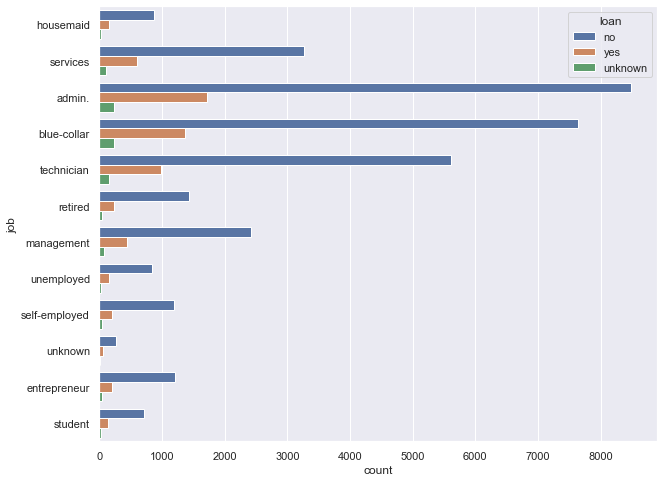

In [20]:
sns.countplot(y='job', hue='loan', data=df)

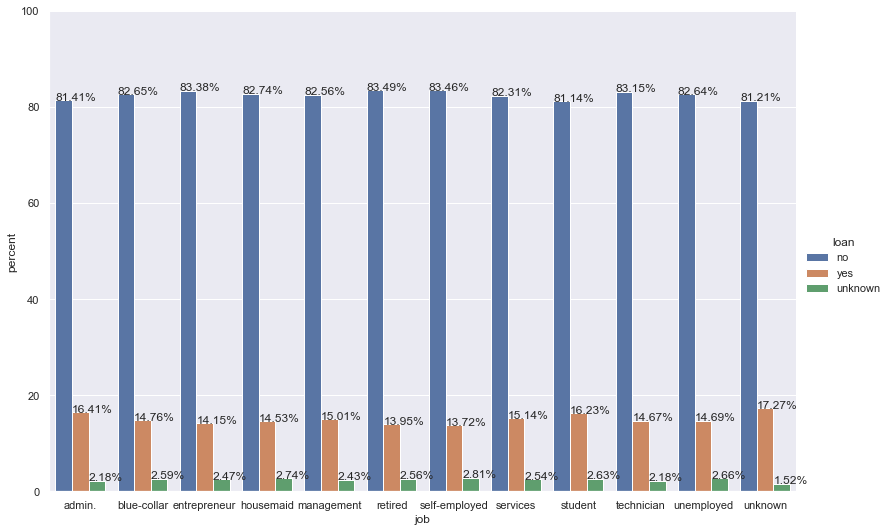

In [21]:
df1 = df.groupby('job')['loan'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = 'job', y = 'percent', hue = 'loan', kind = 'bar', data = df1, height = 7.5, aspect = 1.5)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Как видим, не зависимо от работы в процентном соотношении люди берут в долг примерно все на одном уровне - 14%

Также дополнительно оценим как зависит работа, где работают на депозит. Сначала построим таблицу, а затем график с процентами

In [22]:
pd.crosstab(df.job, df.y)

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


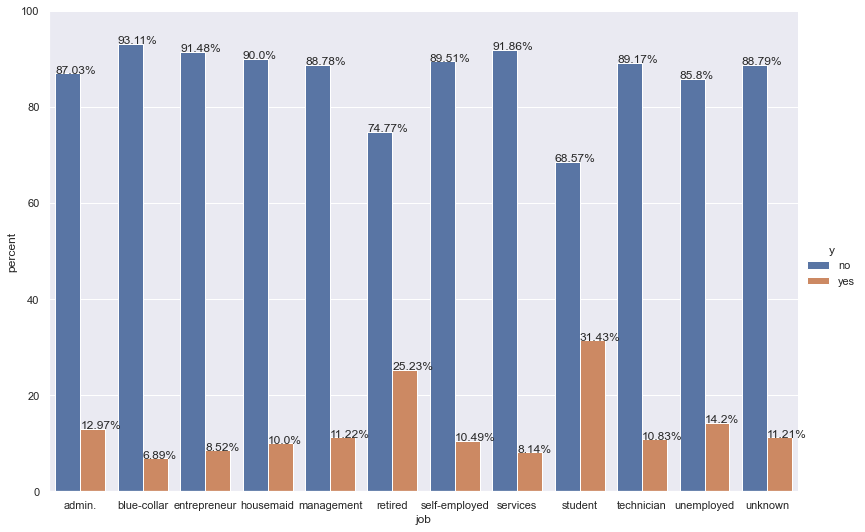

In [23]:
df1 = df.groupby('job')['y'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = 'job', y = 'percent', hue = 'y', kind = 'bar', data = df1, height = 7.5, aspect = 1.5)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Студенты более активно берут депозит чем кто либо.

Теперь оценим средний возраст людей, что берут долг

In [24]:
df[df['loan'] == "yes"]["age"].mean()

39.846670934699105

In [25]:
df1 = df.groupby('loan')['age'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
a = df1[df1['loan'] == "yes"]['percent'].max()
df1[df1['percent'] == a]

,loan,age,percent
134,yes,35,4.849552


Так мы узнали что найболее популярный возраст для займа - 35 лет. Именно в этот возраст 4.84% людей брали в займа

И под конец посмотрим как влияет наличие займа от того будет ли у человека депозит. Как персонального (loan) так и на дом (housing). А так же сравним эти два займа на взаимосвязность

In [26]:
pd.crosstab(df.loan, df.y)

y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


In [27]:
pd.crosstab(df.housing, df.y)

y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


In [28]:
pd.crosstab(df.loan, df.housing)

housing,no,unknown,yes
loan,,,
no,16065,0,17885
unknown,0,990,0
yes,2557,0,3691


На счет займов видно, что те у кого они есть займ (не важно какой) берут депозит менее охотно. Но по большей части люди, даже не смотря на то что у них нет займа, просто не берут депозит. 